![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Linear Interpolation
</b>
</span>

---
**Notebook version**: `1.1` (11 Jun 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Simple function for linear interpolation.
- This example uses non-gapfilled `NEE` (net ecosystem exchange of CO2, negative values indicate CO2 uptake) observations (in `µmol m-2 s-1`).
- Makes direct use of the `GapFinder` class (see `notebooks/Analyses/GapFinder.ipynb`). `GapFinder` identifies gap locations, gap lengths and the start and end datetime of a gap.

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

warnings.simplefilter("ignore", UserWarning)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from diive.core.plotting.timeseries import TimeSeries  # For simple (interactive) time series plotting
from diive.pkgs.gapfilling.interpolate import linear_interpolation
from diive.configs.exampledata import load_exampledata_parquet
from diive.core.plotting.heatmap_datetime import HeatmapDateTime

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.82.1


In [2]:
help(linear_interpolation)

Help on function linear_interpolation in module diive.pkgs.gapfilling.interpolate:

linear_interpolation(series: pandas.core.series.Series, limit: int = 3) -> pandas.core.series.Series
    Fill gaps in series with a linear interpolation up to a specified limit.



</br>

# **Load example data**

In [3]:
df = load_exampledata_parquet()
df = df.loc[df.index.year == 2022].copy()
series = df['NEE_CUT_REF_orig'].copy()

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.039 seconds). Detected time resolution of <30 * Minutes> / 30min 


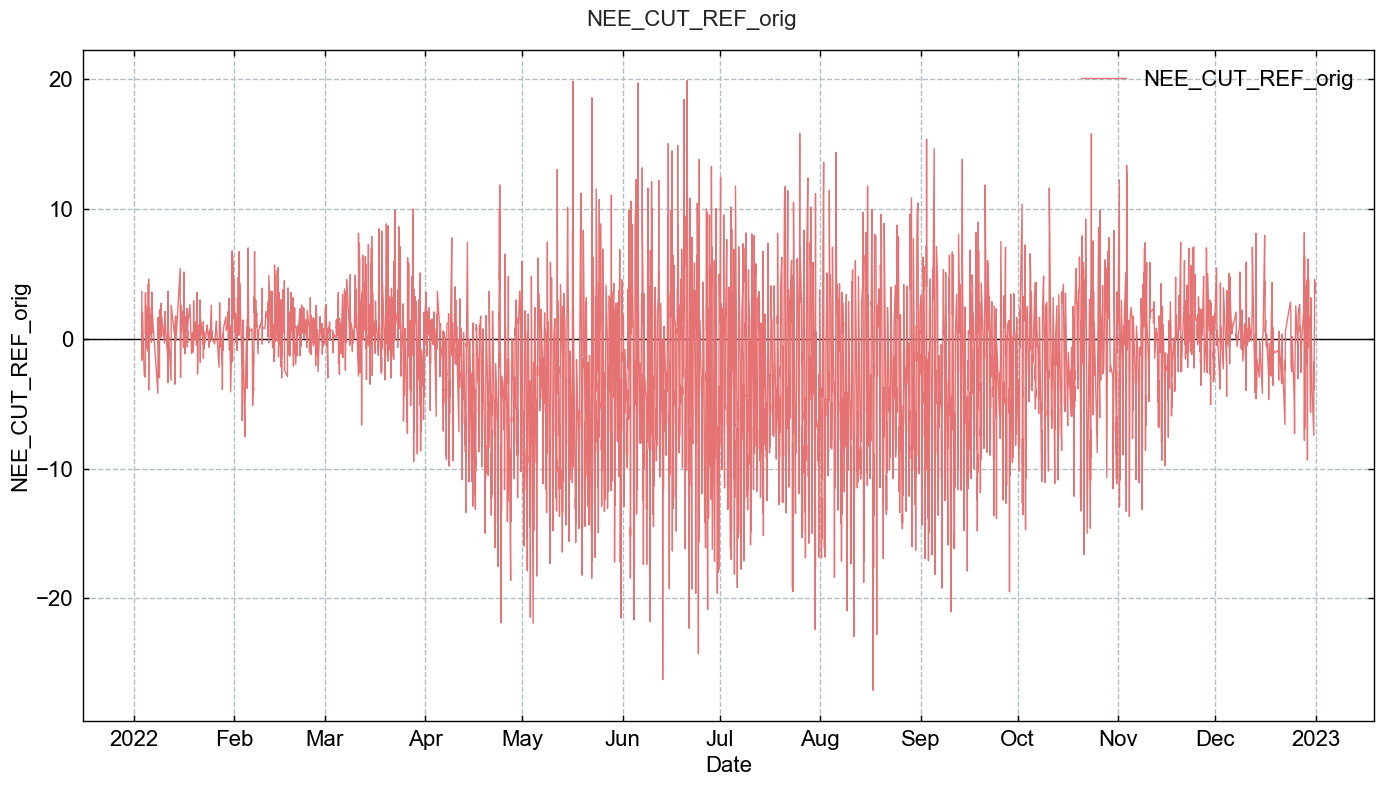

In [4]:
TimeSeries(series=series).plot()

In [5]:
print(f"Missing values before linear interpolation: {series.isnull().sum()}")

Missing values before linear interpolation: 11412


</br>

# **Fill gaps with linear interpolation**
- Use linear interpolation for all gaps with length `10` or shorter.
- Gaps longer than `10` records will not be gap-filled.

In [6]:
series_gapfilled = linear_interpolation(series=series, limit=10)

In [7]:
print(f"Missing values after linear interpolation: {series_gapfilled.isnull().sum()}")

Missing values after linear interpolation: 7856


</br>

# **Plot comparison**

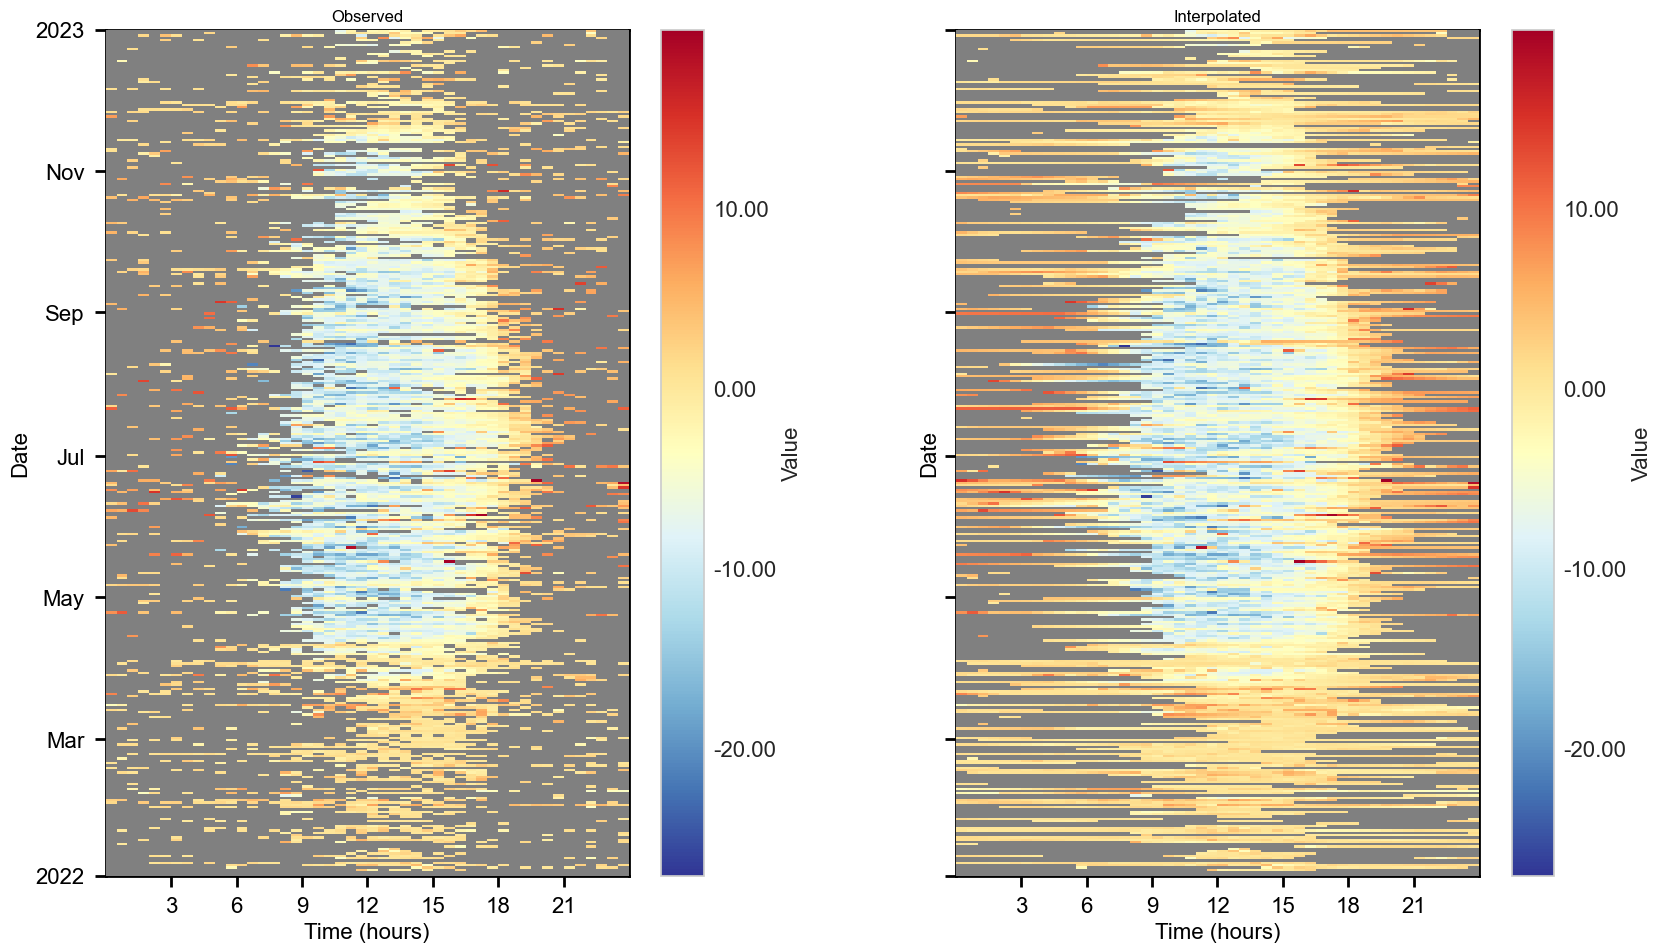

In [8]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 2)  # rows, cols
gs.update(wspace=0.3, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax_input = fig.add_subplot(gs[0, 0])
ax_output = fig.add_subplot(gs[0, 1])
HeatmapDateTime(ax=ax_input, series=series).plot()
HeatmapDateTime(ax=ax_output, series=series_gapfilled).plot()
ax_input.set_title("Observed", color='black')
ax_output.set_title("Interpolated", color='black')
ax_input.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_output.tick_params(left=True, right=False, top=False, bottom=True,
                      labelleft=False, labelright=False, labeltop=False, labelbottom=True)
fig.show()

</br>

# **End of notebook**

In [9]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-09-20 00:12:30
